<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/Act10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

Vilchis García Karla Ivonne


---



## Ejercicio
Dos personas han quedado citas en un determinado lugar. Ambas tienen la mismaprobabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).Determínese la probabilidad de que el tiempo que una persona espere a la otra seacomo máximo 10 minutos.

**PASO 1**. Defina las variables que intervienen en el modelo.

$\chi:$ tiempo de llegada de cada
$$\chi_1 \sim U(0,30)$$
$$\chi_2 \sim U(0,30)$$

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$a=0, b=30$

$$\chi_1 \sim f(x)=\frac{1}{b-a}=\frac{1}{30}  \qquad \forall \chi_1 \in [a,b]$$

$$\chi_2 \sim f(x)=\frac{1}{b-a}=\frac{1}{30} \qquad \forall  \chi_2 \in [a,b]$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$F(\chi_1)=\int_{-\infty}^{\chi_1}f(t)dt=\frac{\chi_1}{30}$

$F(\chi_2)=\int_{-\infty}^{\chi_2}f(t)dt=\frac{\chi_2}{30}$



**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

condición de diferencia de tiempo:
$$|\chi_1 - \chi_2 | \leq 10$$

Buscamos $P(|\chi_1 - \chi_2 | \leq 10)$

**PASO 5**. Genere números aleatorios.

In [5]:
import random
def experimento(n):
    exitos=0
    for i  in range(n):
        X=random.uniform(0,30)
        Y=random.uniform(0,30)
        if abs(X-Y)<=10:
            exitos+=1
    prob=exitos/n
    return prob
#Ejemplo
n=1500
A=experimento(n)
print(A)

0.5713333333333334


**PASO 6**. Repetir M veces el experimento

In [6]:
import numpy as np
def muestra(m):
    lista =[]
    for i in range(m):
        d =experimento(i+1)
        lista.append(d)
    return lista

n = 1000
B=muestra(2000)
print('MEDIA Muestra:',np.mean(B))
print('VARIANZA Muestra:', np.var(B))
print('DESVIACIÓN ESTÁNDAR Muestra:', np.std(B))

MEDIA Muestra: 0.55604188274461
VARIANZA Muestra: 0.0009896413270532453
DESVIACIÓN ESTÁNDAR Muestra: 0.031458565241492584


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

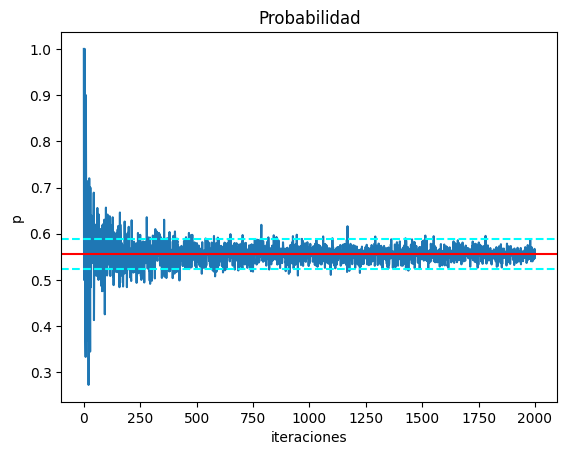

In [8]:
import matplotlib.pyplot as plt
plt.plot(B)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.axhline(y=np.mean(B), color='r', label="media:")
plt.axhline(y=np.mean(B)+np.std(B),color='cyan', linestyle='--', label="Varianza")
plt.axhline(y=np.mean(B)-np.std(B), color='cyan', linestyle='--')
plt.show()

**PASO 8**. Replique el modelo.

In [9]:
#Replicamos el modelo las repeticiones que deseemos y obtendremos una distribución uniforme
def simulacion(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [10]:
sim = simulacion(500)

**PASO 9**. Calcule la probabilidad de interferencia y su desviación
estándar.

In [12]:
print('MEDIA:',np.mean(sim))
print('VARIANZA', np.var(sim))
print('DESVIACIÓN ESTÁNDAR', np.std(sim))

MEDIA: 0.5539380000000002
VARIANZA 0.00023058615599999926
DESVIACIÓN ESTÁNDAR 0.015185063582349573


:**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interfere con un nivel de confianza del $95 \%$.

Ocupamos

$$\bar{x} \pm z\cdot \frac{\sigma}{\sqrt{n}}$$

Para ello ocupamos la solución analítica

## Solución analitica

$\chi:$ tiempo de llegada de cada
$$\chi_1 \sim U(0,30)$$
$$\chi_2 \sim U(0,30)$$

condición de diferencia de tiempo:
$$|\chi_1 - \chi_2 | \leq 10$$

Buscamos $P(|\chi_1 - \chi_2 | \leq 10)$
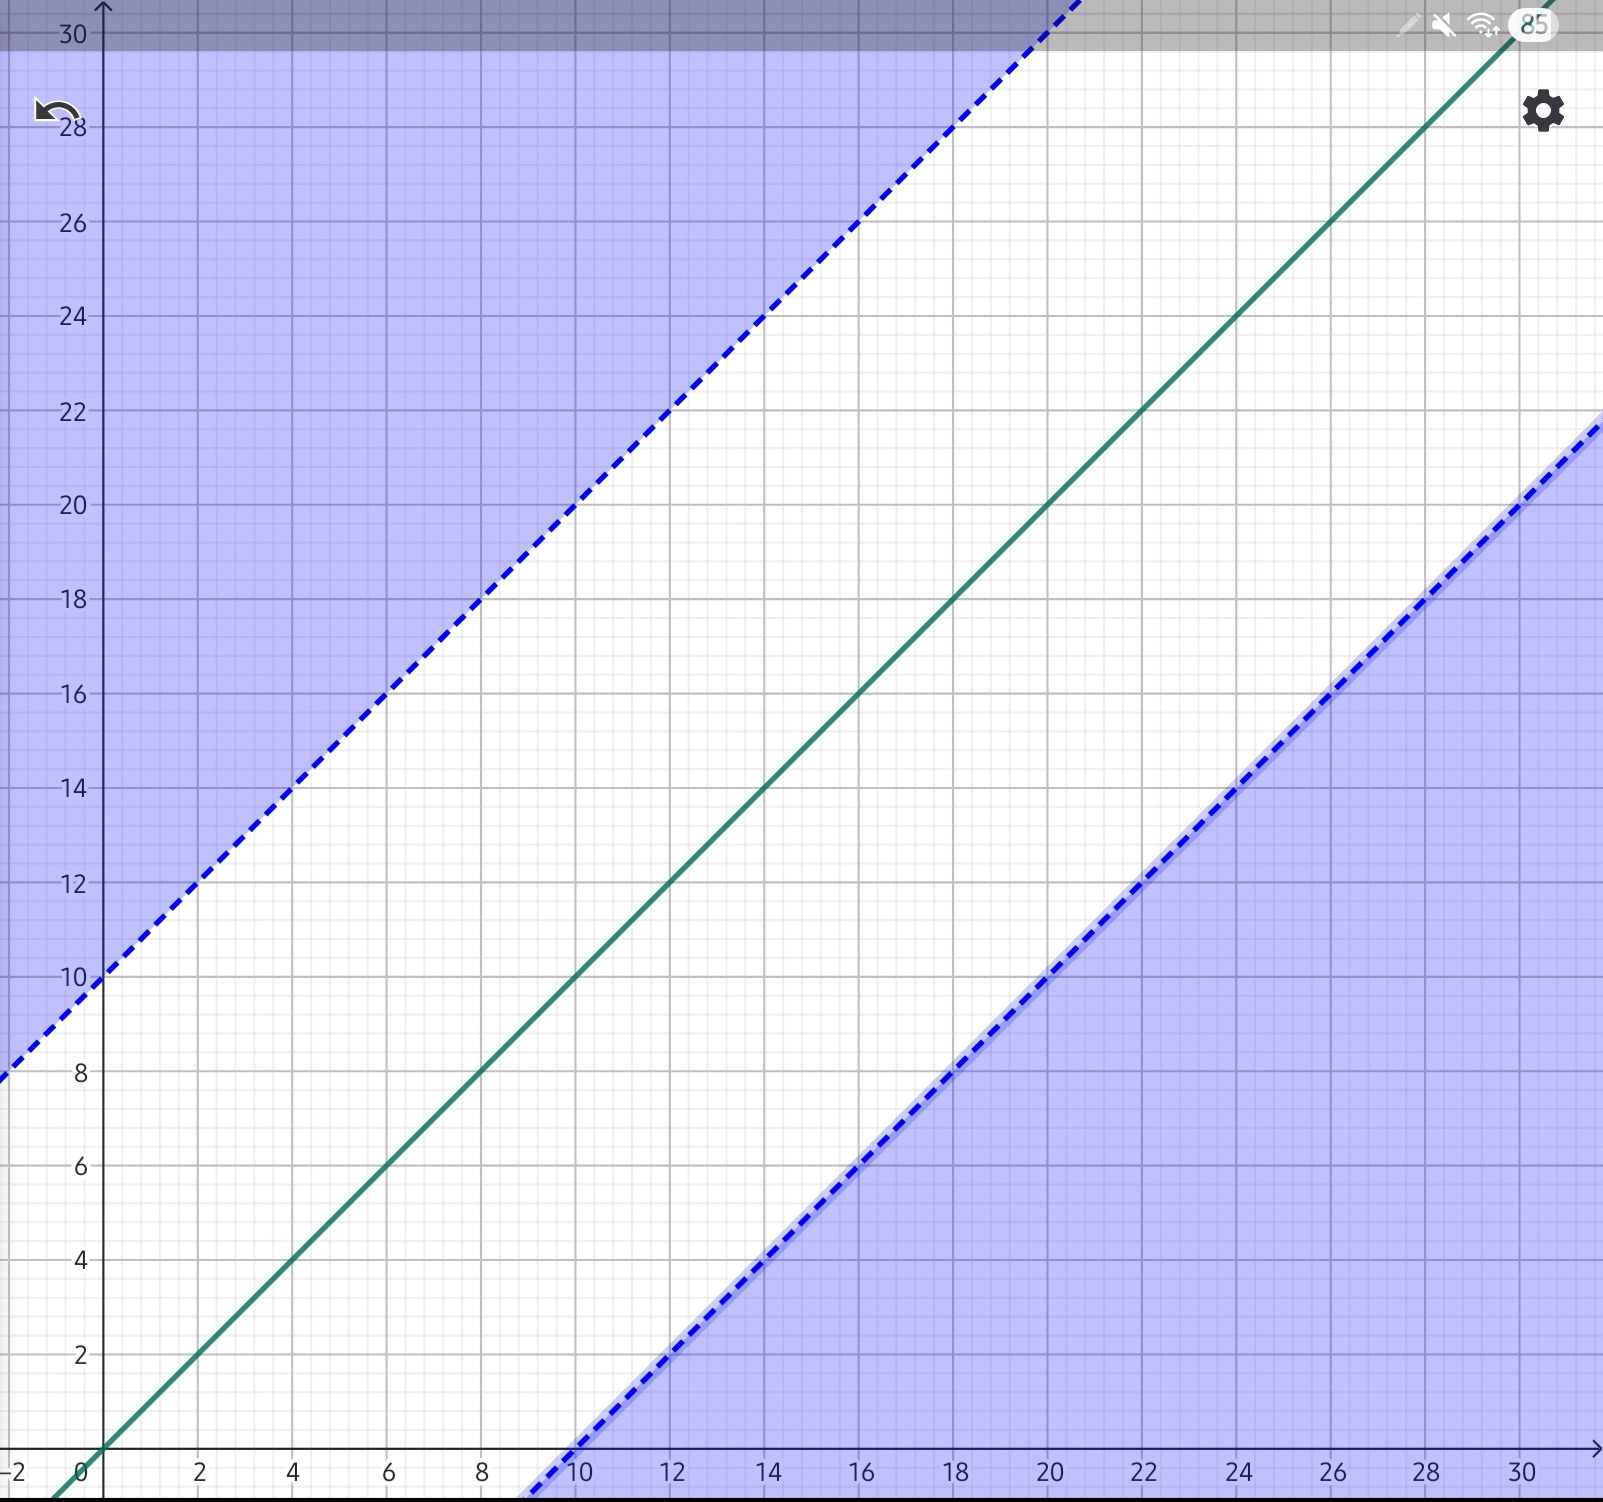

Notemos que el espacio muestral es:

$$30\times 30 = 900$$

ahora, ocupando la condición
$$|\chi_1 - \chi_2 | \leq 10$$

tenemo 2 casos
    $$\chi_2 > \chi_1 +10$$
    $$\chi_1 > \chi_2 +10$$



 veamos que se  forman 2 triángulos rectángulos donde se encuentran los elementos del espacio muestral que no están dentro de la región que necesitamos, enntonces el área  de estas regiones nos servirá para sacar el complemento y obtener la región que nos interesa:

 $$A=\frac{20 \times 20}{2}= 200$$   

 como son el triángulo superior e inferior tenemos $2A=400$

 como mencioné que calcularíamos el complemento tenemos: $900-400=500$
 Así la probabilidad será
 $$P(|\chi_1 - \chi_2 | \leq 10)=\frac{\text{Area dentro del intervalo}}{\text{Area Total}}=\frac{500}{900}=\frac{5}{9} \approx 0.5555 = 55.55\%$$

 Así tenemos que hay una probabilidad del 55.55% de que lleguen con a lo más 10 minutos de diferencia.